[View in Colaboratory](https://colab.research.google.com/github/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/blob/master/Linear_Regression_BajajFin%20Graph.ipynb)

In [207]:
!pip freeze

absl-py==0.4.1
altair==2.2.2
astor==0.7.1
beautifulsoup4==4.6.3
bleach==2.1.4
cachetools==2.1.0
certifi==2018.8.24
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==1.31.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
future==0.16.0
gast==0.2.0
google-api-core==1.4.0
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.3
grpcio==1.15.0
h5py==2.8.0
html5lib==1.0.1
httplib2==0.11.3
idna==2.6
inflection==0.3.1
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.12.5
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
Keras==2.1.6
Markdown==2.6.11
MarkupSafe==1.0
matplotlib==2.1.2
mistune==0.8.3
more-itertools==4.3.0
mpmath==1.0.0
msgpack==0.5.6

In [208]:
!pip install quandl

In [209]:
!pip install sklearn
!pip install pandas

In [210]:
#!pip install quandl
import pandas as pf
import quandl
df = quandl.get("NSE/BAJFINANCE", authtoken="JvPxndekpt7dVpVZnwLR")
print(df)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2010-09-29   780.00   805.00   770.00   776.00   774.60               26000.0   
2010-09-30   775.00   783.45   766.25   772.00   773.55               17350.0   
2010-10-01   763.00   797.30   760.25   773.60   774.95               35941.0   
2010-10-04   788.00   795.00   775.00   786.65   783.40               31160.0   
2010-10-05   775.10   788.00   772.05   778.95   779.00               32141.0   
2010-10-06   812.00   812.00   773.00   799.95   799.45               69177.0   
2010-10-07   791.00   807.00   778.20   786.90   783.85               38093.0   
2010-10-08   780.00   799.00   776.55   779.50   779.25               20060.0   
2010-10-11   782.50   798.00   782.50   792.00   793.65               16798.0   
2010-10-12   782.10   803.95   782.10   800.00   798.15               22402.0   
2010-10-13   791.00   805.00

In [211]:
df = df[['Open','Close','High','Low']]
print(df.head())

             Open   Close    High     Low
Date                                     
2010-09-29  780.0  774.60  805.00  770.00
2010-09-30  775.0  773.55  783.45  766.25
2010-10-01  763.0  774.95  797.30  760.25
2010-10-04  788.0  783.40  795.00  775.00
2010-10-05  775.1  779.00  788.00  772.05


In [212]:
#Getting Features from data:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


df = df[['Open','Close','PCT_Change','High','Low','HL_PCT']]

print(df)

               Open    Close  PCT_Change     High      Low    HL_PCT
Date                                                                
2010-09-29   780.00   774.60   -0.692308   805.00   770.00  4.545455
2010-09-30   775.00   773.55   -0.187097   783.45   766.25  2.244698
2010-10-01   763.00   774.95    1.566186   797.30   760.25  4.873397
2010-10-04   788.00   783.40   -0.583756   795.00   775.00  2.580645
2010-10-05   775.10   779.00    0.503161   788.00   772.05  2.065928
2010-10-06   812.00   799.45   -1.545567   812.00   773.00  5.045278
2010-10-07   791.00   783.85   -0.903919   807.00   778.20  3.700848
2010-10-08   780.00   779.25   -0.096154   799.00   776.55  2.890992
2010-10-11   782.50   793.65    1.424920   798.00   782.50  1.980831
2010-10-12   782.10   798.15    2.052167   803.95   782.10  2.793760
2010-10-13   791.00   797.60    0.834387   805.00   791.00  1.769912
2010-10-14   798.00   805.40    0.927318   807.00   798.00  1.127820
2010-10-15   795.00   784.90   -1.

In [213]:
import math
#Conceptual Logic
forecast_col = 'Close'
df.fillna(700, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)
df['Label'] = df[forecast_col].shift(-forecast_out)

print(df)

20
               Open    Close  PCT_Change     High      Low    HL_PCT    Label
Date                                                                         
2010-09-29   780.00   774.60   -0.692308   805.00   770.00  4.545455   777.35
2010-09-30   775.00   773.55   -0.187097   783.45   766.25  2.244698   770.60
2010-10-01   763.00   774.95    1.566186   797.30   760.25  4.873397   774.45
2010-10-04   788.00   783.40   -0.583756   795.00   775.00  2.580645   798.60
2010-10-05   775.10   779.00    0.503161   788.00   772.05  2.065928   806.40
2010-10-06   812.00   799.45   -1.545567   812.00   773.00  5.045278   799.25
2010-10-07   791.00   783.85   -0.903919   807.00   778.20  3.700848   810.30
2010-10-08   780.00   779.25   -0.096154   799.00   776.55  2.890992   811.90
2010-10-11   782.50   793.65    1.424920   798.00   782.50  1.980831   809.15
2010-10-12   782.10   798.15    2.052167   803.95   782.10  2.793760   815.80
2010-10-13   791.00   797.60    0.834387   805.00   791.00  1

In [214]:
#Removing NaN if Req.
df.dropna(inplace=True)
print(df.tail())

               Open    Close  PCT_Change     High      Low    HL_PCT    Label
Date                                                                         
2018-08-13  2807.95  2760.40   -1.693406  2807.95  2754.20  1.951565  2594.00
2018-08-14  2763.30  2830.20    2.421018  2837.50  2763.30  2.685195  2672.20
2018-08-16  2832.00  2856.60    0.868644  2908.00  2822.05  3.045658  2604.60
2018-08-17  2866.00  2851.20   -0.516399  2885.00  2841.50  1.530882  2570.40
2018-08-20  2877.95  2839.75   -1.327334  2877.95  2836.30  1.468462  2499.55


In [215]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X = np.array(df.drop(['Label'],1))
X = preprocessing.scale(X)
#X=X[:-forecast_out:]

X_lately = X[-forecast_out:]

print(X)
#y = np.array(df['Label'])
#print(y)


df.dropna(inplace=True)
#print(X) #will remove +e Values and Scale all the data to limit set.
y = np.array(df['Label'])

print(len(X),len(y)) # Data Length Matrix Should be Equal.

[[-0.730909   -0.73345254 -0.3544887  -0.72573917 -0.72946044  0.54900704]
 [-0.73327179 -0.73394848 -0.11930043 -0.73577049 -0.73126102 -0.57690811]
 [-0.7389425  -0.73328722  0.69689644 -0.72932345 -0.73414195  0.70949134]
 ...
 [ 0.23878244  0.24993708  0.37217324  0.25318725  0.25584115 -0.18494435]
 [ 0.25484946  0.2473865  -0.2725989   0.24248097  0.26518016 -0.9262267 ]
 [ 0.26049654  0.24197833 -0.65010913  0.23919926  0.26268335 -0.9567726 ]]
1960 1960


In [216]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7954941946848734


In [217]:
clf2 = svm.SVR(kernel = 'linear') #Kernel = 'linear','poly',‘rbf’, ‘sigmoid’, default = 'rbf'
clf2.fit(X_train,y_train)
accuracy2 = clf2.score(X_test,y_test)
print(accuracy2)

0.7930756183927616


In [218]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[2655.93864145 2713.75292314 2635.40783    2648.16138952 2669.01671665
 2653.601479   2620.52390102 2628.16447935 2627.50684537 2654.45974791
 2659.8854853  2719.83618915 2736.93188197 2760.55635171 2728.6763833
 2724.22622705 2749.035934   2744.85187083 2755.2038677  2770.05589496] 0.7954941946848734 20


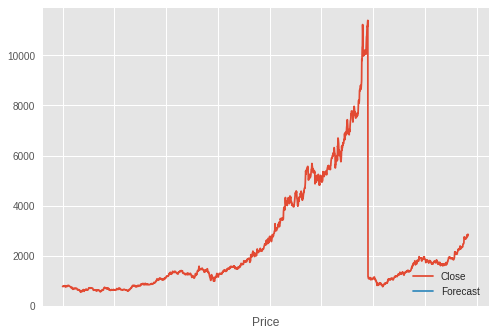

In [223]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
#print(last_date)

last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc['next_date'] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.xlabel('Price')
plt.show()
